In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Administrator\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df = pd.read_csv("Iris-cleaned.csv")
df.head(3)

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [9]:
features = df.drop(df.columns[-1],axis=1)
features=(features-features.mean())/features.std()
target = pd.get_dummies(df[df.columns[-1]])
X = features.values
Y = target.values

In [10]:
X.shape

(150, 4)

RMSE validation = 0.2655075599003587
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 6)                 30        
_________________________________________________________________
activation_5 (Activation)    (None, 6)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 35        
_________________________________________________________________
activation_6 (Activation)    (None, 5)                 0         
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 18        
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________


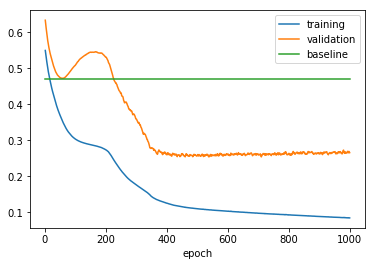

In [12]:
model = Sequential()
model.add(Dense(6,input_shape=(4,)))
model.add(Activation('relu'))
model.add(Dense(5))
model.add(Activation('relu'))
model.add(Dense(3))
model.compile(loss="mean_squared_error",optimizer="Adam")
hist = model.fit(X,Y,epochs=1000,validation_split=0.2,verbose=0)
results = pd.DataFrame()
results['epoch'] = hist.epoch
results['epoch'] = results['epoch'] + 1
results['training'] = np.sqrt(hist.history['loss'])
results['validation'] = np.sqrt(hist.history['val_loss'])
results['baseline'] = y.std()
ax = results.plot.line(x='epoch',y='training')
ax = results.plot.line(x='epoch',y='validation',ax=ax)
results.plot.line(x='epoch',y='baseline',ax=ax)
print("RMSE validation =",results.validation.iloc[-1])
model.summary()